<a href="https://colab.research.google.com/github/The-DigitalAcademy/TrendHunt-Application/blob/Model/Copy_of_Image_recognition_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Specify the path to the directory you want to list
directory_path = "/content/drive/MyDrive/my data/train"  # Replace with the actual path

# List the contents of the directory
contents = os.listdir(directory_path)

# Print the list of contents
print(contents)


['.DS_Store', 'Shirt', 'Shoes', 'Trousers', 'T-shirt', 'Dresses', 'Skirts']


In [4]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 21s 0us/step


In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


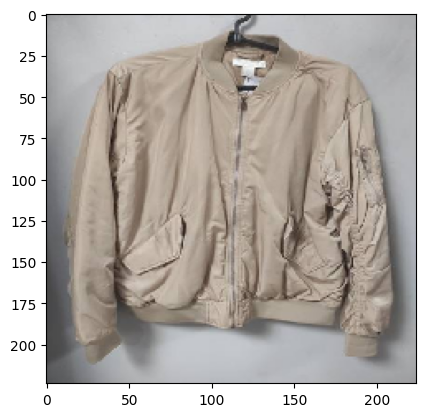

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image  # Import the image module from TensorFlow's Keras

# Define a function to load and preprocess an image
def load_image(path):
    img = image.load_img(path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return img, x

# Example usage of the load_image function
img, x = load_image("/content/drive/MyDrive/my data/test/fcb9e84b-a040-4871-891e-8c43ed40bc25.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)
plt.show()


In [8]:
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load and preprocess an image (replace 'path_to_image.jpg' with the actual path to your image)
img_path = '/content/drive/MyDrive/my data/test/fcb9e84b-a040-4871-891e-8c43ed40bc25.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the model
predictions = model.predict(x)

# Decode the predictions to get class labels and probabilities
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Print the top predicted classes and their probabilities
for label, description, score in decoded_predictions:
    print(f"{description} ({label}): {score:.2f}")


35363/35363 [==============================] - 0s 0us/step
trench_coat (n04479046): 0.54
fur_coat (n03404251): 0.09
cloak (n03045698): 0.08
poncho (n03980874): 0.05
velvet (n04525038): 0.03


In [9]:
# # forward the image through the network
# predictions = model.predict(x)

# # print out the
# for _, pred, prob in decode_predictions(predictions)[0]:
#     print("predicted %s with probability %0.3f" % (pred, prob))


In [10]:
# Assuming you have already made predictions using your model
for pred in predictions:
    print("Predicted values:", pred)




Predicted values: [1.53368892e-05 5.00101862e-07 8.71823522e-06 1.86229154e-05
 1.18990174e-05 1.16122310e-05 1.91917643e-05 1.33185097e-06
 8.18432000e-07 4.91998833e-07 3.84214718e-06 1.25775250e-06
 1.68626082e-06 2.25387885e-06 1.89530283e-06 1.02327022e-06
 1.50983271e-06 3.05531125e-06 2.45633692e-06 4.97483961e-06
 3.13822483e-07 3.35013829e-06 3.54405415e-06 3.17766967e-06
 4.48344645e-06 1.45854676e-06 1.08133008e-06 1.97184272e-06
 3.12033853e-06 8.16282181e-07 1.53755434e-06 1.39812000e-05
 1.04771589e-05 2.90807588e-06 2.05914075e-05 3.09270177e-07
 1.48908100e-06 7.06870026e-07 3.36494759e-06 1.50908420e-06
 4.82511905e-06 1.39821793e-06 1.14568172e-06 4.70157011e-06
 1.71228635e-06 2.75192747e-06 2.21955383e-06 2.41420639e-06
 1.69355656e-06 1.93982487e-06 2.84308180e-06 4.84523343e-06
 5.00213264e-06 1.98086150e-06 2.53456119e-06 2.38573443e-06
 1.72170337e-06 7.94591699e-07 9.90020339e-07 6.57588180e-06
 6.76131140e-06 1.27601716e-05 4.96657231e-06 3.23199197e-06
 2.177

In [11]:
# import tensorflow as tf

# # Specify the name of the last dense layer
# layer_name = 'dense_6'  # Use the correct layer name

# # Create a feature extractor model using the specified layer name
# feat_extractor = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# # Print the summary of the feature extractor model
# feat_extractor.summary()




In [12]:
# img, x = load_image("/content/drive/MyDrive/my data/test/fdbcfdcd-5deb-4a20-9aef-b708831ef774.jpg")
# feat = feat_extractor.predict(x)

# plt.figure(figsize=(16,4))
# plt.plot(feat[0])

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
# Specify the layer from which you want to extract features
layer_name = 'fc2'  # Change this to the desired layer

# Create a feature extractor model
feat_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# Define a function to load and preprocess an image
def load_image(path):
    img = image.load_img(path, target_size=(224, 224))  # Make sure to adjust the target size
    x = image.img_to_array(img)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    return img, x

# Example usage of the load_image function
img, x = load_image("/content/drive/MyDrive/my data/test/fdbcfdcd-5deb-4a20-9aef-b708831ef774.jpg")  # Replace with the path to your image
print("shape of x: ", x.shape)
print("data type: ", x.dtype)

# Extract features from the image
features = feat_extractor.predict(x)

# Print the shape of the extracted features
print("Shape of extracted features:", features.shape)


shape of x:  (1, 224, 224, 3)
data type:  float32
1/1 [==============================] - 1s 1s/step
Shape of extracted features: (1, 4096)


In [13]:
images_path = '/content/drive/MyDrive/my data/train'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 1291 images to analyze


In [14]:
import time

# Record the start time
tic = time.perf_counter()

features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.perf_counter()
        elap = toc - tic
        print("Analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images), elap))
        tic = time.perf_counter()
    img, x = load_image(image_path)
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('Finished extracting features for %d images' % len(images))

# Record the end time
toc = time.perf_counter()

# Calculate and print the total elapsed time
total_time = toc - tic
print(f'Total elapsed time: {total_time} seconds')



# import time

# # Record the start time
# tic = time.perf_counter()

# features = []
# for i, image_path in enumerate(images):
#     if i % 500 == 0:
#         toc = time.perf_counter()
#         elap = toc - tic
#         print("Analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images), elap))
#         tic = toc  # Update the start time
#     img, x = load_image(image_path)
#     feat = feat_extractor.predict(x)[0]
#     features.append(feat)

# print('Finished extracting features for %d images' % len(images))

# # Record the end time
# toc = time.perf_counter()

# # Calculate and print the total elapsed time
# total_time = toc - tic
# print(f'Total elapsed time: {total_time} seconds')


Analyzing image 0 / 1291. Time: 0.0003 seconds.
1/1 [==============================] - 1s 1s/step
Analyzing image 500 / 1291. Time: 576.1290 seconds.
1/1 [==============================] - 1s 567ms/step
Analyzing image 1000 / 1291. Time: 756.3173 seconds.
1/1 [==============================] - 1s 1s/step
Finished extracting features for 1291 images
Total elapsed time: 434.9927214489999 seconds


In [15]:
from sklearn.decomposition import PCA

# Define the number of components you want to use (less than or equal to 6)
n_components = 6

# Create a PCA model
pca = PCA(n_components=n_components)

# Fit the PCA model to your features
pca.fit(features)  # Replace 'features' with your actual feature data


PCA(n_components=6)

In [16]:
pca_features = pca.transform(features)

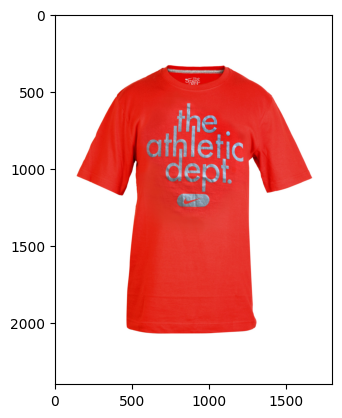

In [17]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

In [18]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [19]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

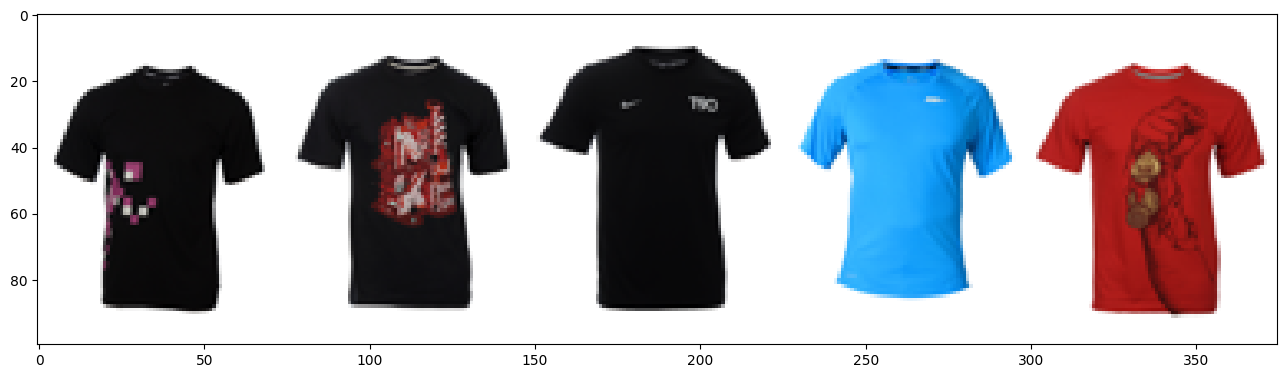

In [20]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)


In [21]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image


Text(0.5, 1.0, 'query image (1259)')

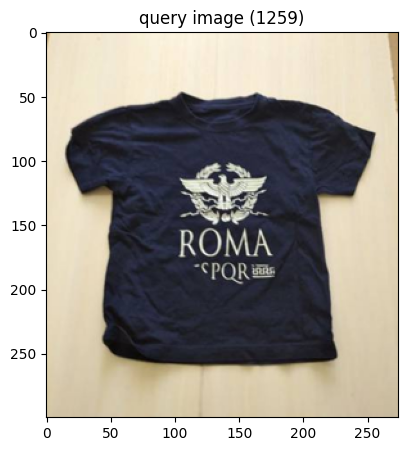

In [22]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

Text(0.5, 1.0, 'result images')

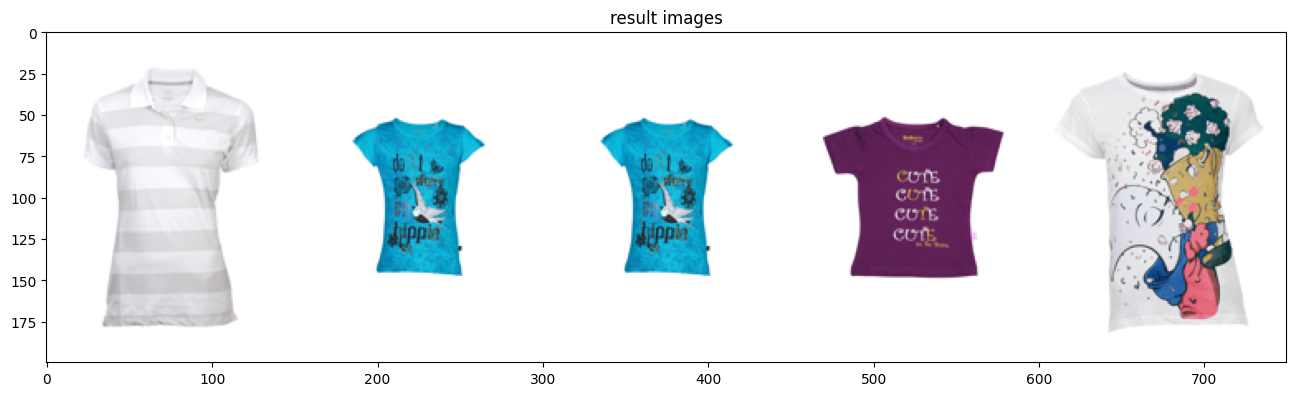

In [23]:


# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Text(0.5, 1.0, 'query image (239)')

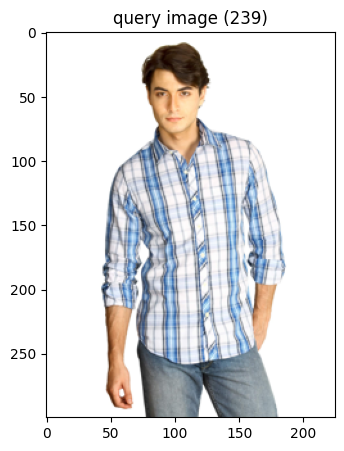

In [24]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

Text(0.5, 1.0, 'result images')

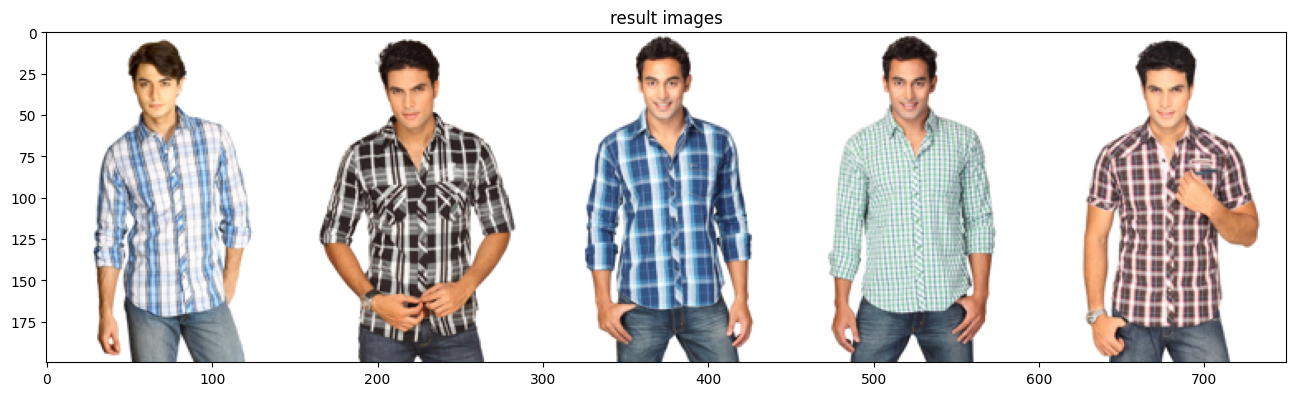

In [25]:
# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Mounted at /content/drive
1/1 [==============================] - 1s 592ms/step


Text(0.5, 1.0, 'result images')

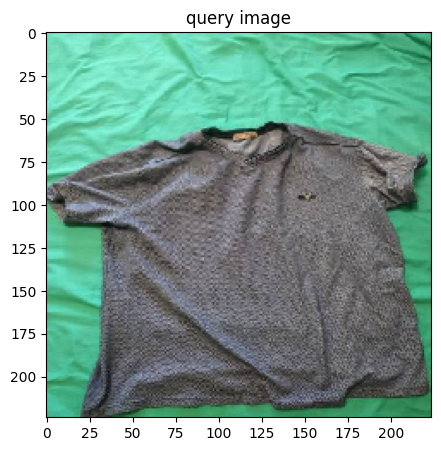

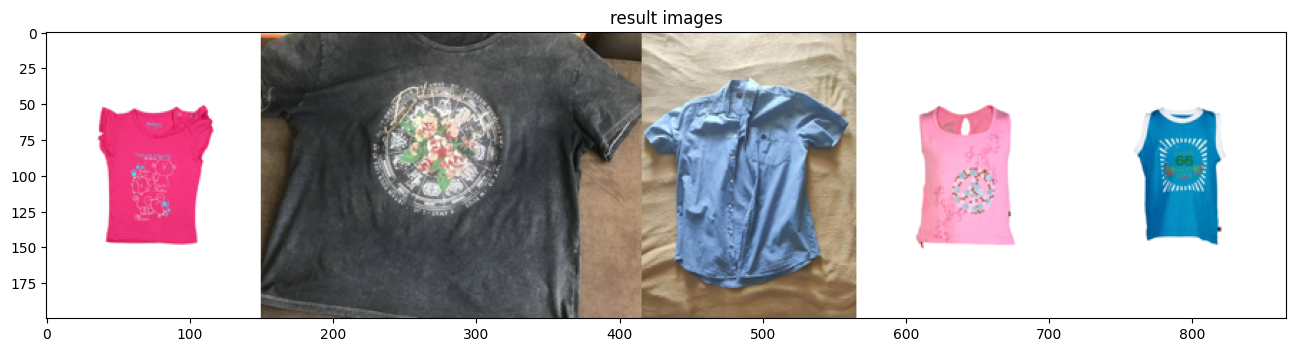

In [26]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# load image and extract features
new_image, x = load_image("/content/drive/MyDrive/Data/Validation/T-shirt/2b1774a1-a7fe-4cdd-997c-7e58e5459e96.jpg")
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

In [27]:
import pickle

# Specify the complete file path, including the filename
file_path = '/content/drive/MyDrive/my data.p'

# Serialize and save the data to the specified file
pickle.dump([images, pca_features, pca], open(file_path, 'wb'))


In [28]:
# # Save the model to a file using the native Keras format
# model.save("/content/drive/MyDrive/my_data/my_model.keras")


In [29]:
# Save the model to a file
#model.save("/content/drive/MyDrive/my_data/my_model.h5")


In [30]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 10.9 MB/s eta 0:00:00


In [31]:
!wget -q -O - ipv4.icanhazip.com


35.234.10.244


In [32]:
from scipy.spatial import distance


In [33]:
%%writefile app.py
import streamlit as st
import os
import keras
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from PIL import Image
import pickle
from scipy.spatial import distance  # Add this import statement

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load the saved PCA features and images list
file_path = '/content/drive/MyDrive/my data.p'
images, pca_features, pca = pickle.load(open(file_path, 'rb'))

# Define the feature extractor using the VGG16 model
base_model = VGG16(weights='imagenet')
layer_name = 'fc2'
feat_extractor = keras.models.Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# Function to load and preprocess an image
def load_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    return x

# Streamlit UI
st.title("Image Classifier with Streamlit")

# Upload an image
uploaded_image = st.file_uploader("Upload an image...", type=["jpg", "png", "jpeg"])

if uploaded_image is not None:
    # Display the uploaded image
    st.image(uploaded_image, caption="Uploaded Image", use_column_width=True)

    # Perform predictions on the uploaded image
    img = Image.open(uploaded_image)
    img_path = "temp_image.jpg"
    img.save(img_path)

    # Load and preprocess the uploaded image
    x = load_image(img_path)

    # Make predictions using the model
    predictions = model.predict(x)

    # Decode the predictions to get class labels and probabilities
    decoded_predictions = decode_predictions(predictions, top=5)[0]

    st.subheader("Top Predicted Classes:")
    for label, description, score in decoded_predictions:
        st.write(f"{description} ({label}): {score:.2f}")

    # Calculate PCA features for the uploaded image
    img_features = feat_extractor.predict(x)[0]
    img_pca_features = pca.transform([img_features])[0]

    # Calculate distances to all other images
    distances = [distance.cosine(img_pca_features, feat) for feat in pca_features]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]

    st.subheader("Most Similar Images:")
    for idx in idx_closest:
        similar_img = Image.open(images[idx])
        st.image(similar_img, caption=f"Similar Image {idx}", use_column_width=True)

# Add a sidebar to display additional information or options if needed
# st.sidebar.title("Options")
# st.sidebar.write("You can add sidebar options here.")


Writing app.py


In [34]:
#%%writefile app.py


# import streamlit as st
# import keras
# from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
# from keras.preprocessing import image
# import numpy as np
# import os
# from PIL import Image
# import pickle
# from scipy.spatial import distance

# # Load the pre-trained VGG16 model
# model = VGG16(weights='imagenet')

# # Load PCA features and data
# file_path = '/content/drive/MyDrive/my data.p'
# images, pca_features, pca = pickle.load(open(file_path, 'rb'))

# # Load and preprocess an image
# def load_image(path):
#     img = image.load_img(path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     return img, x

# st.title("Image Similarity Search")

# # Upload an image for similarity search
# uploaded_image = st.file_uploader("Upload an image...", type=["jpg", "png", "jpeg"])
# if uploaded_image:
#     # Display the uploaded image
#     st.image(uploaded_image, caption="Uploaded Image", use_column_width=True)

#     # Perform similarity search when a button is clicked
#     if st.button("Find Similar Images"):
#         # Load and preprocess the uploaded image
#         img = Image.open(uploaded_image)
#         img_path = "uploaded_image.jpg"
#         img.save(img_path)
#         img, x = load_image(img_path)

#         # Make predictions using the model
#         predictions = model.predict(x)

#         # Decode the predictions to get class labels and probabilities
#         decoded_predictions = decode_predictions(predictions, top=5)[0]

#         # Print the top predicted classes and their probabilities
#         st.subheader("Top Predictions for Uploaded Image:")
#         for label, description, score in decoded_predictions:
#             st.write(f"{description} ({label}): {score:.2f}")

#         # Display the uploaded image
#         st.subheader("Uploaded Image:")
#         st.image(uploaded_image, use_column_width=True)

#         # Perform similarity search
#         def get_closest_images(query_image_idx, num_results=5):
#             distances = [distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features]
#             idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results + 1]
#             return idx_closest

#         def get_concatenated_images(indexes, thumb_height):
#             thumbs = []
#             for idx in indexes:
#                 img = Image.open(images[idx])
#                 img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
#                 thumbs.append(img)
#             concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
#             return concat_image

#         query_image_idx = int(len(images) * np.random.random())
#         idx_closest = get_closest_images(query_image_idx)
#         query_image = get_concatenated_images([query_image_idx], 300)
#         results_image = get_concatenated_images(idx_closest, 200)

#         # Display the query image
#         st.subheader("Query Image:")
#         st.image(query_image, use_column_width=True, caption=f"Query Image ({query_image_idx})")

#         # Display the resulting images
#         st.subheader("Result Images:")
#         st.image(results_image, use_column_width=True)

# # Add other Streamlit components and functionality as needed



In [35]:
# from pyngrok import ngrok

# # Set the port where Streamlit will run
# port = 8501

# # Create a public URL for your Streamlit app
# public_url = ngrok.connect(port)
# public_url


In [36]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] - rollbackFailedOptional: verb npm-session 39d9f1558843ebe

npx: installed 22 in 4.707s
your url is: https://lazy-carrots-drive.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.234.10.244:8501

2023-09-11 06:38:17.346701: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==============================] - 1s 720ms/step
  Stopping...
^C
